In [1]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


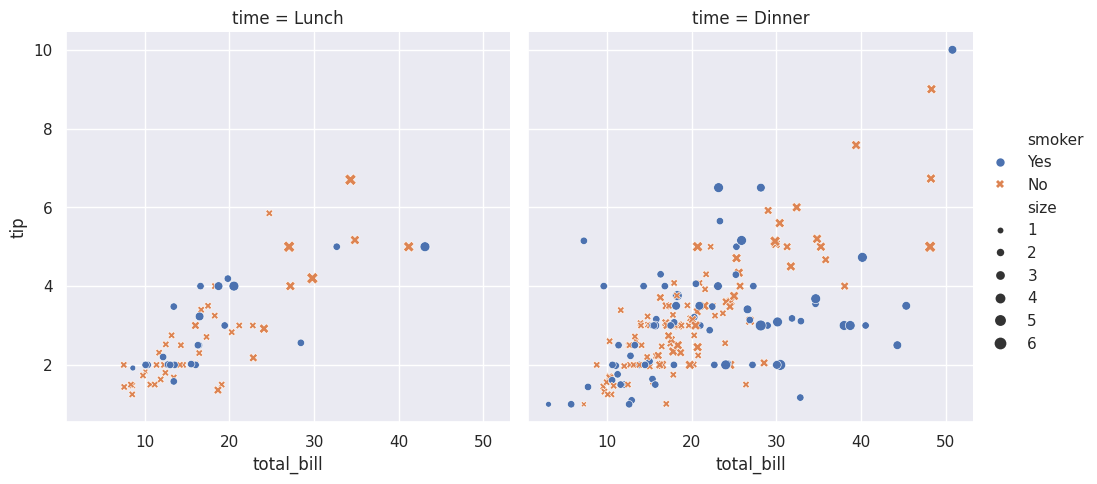

In [2]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

In [3]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


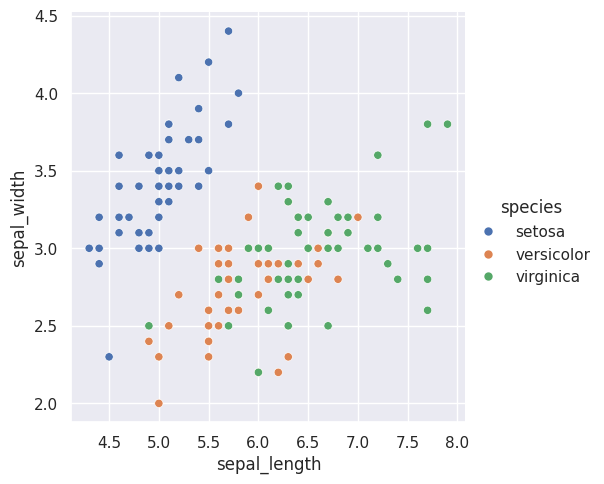

In [4]:
# 使用Seaborn可以很簡單的繪製
sns.relplot(
    data=iris,
    x="sepal_length", y="sepal_width",hue="species")

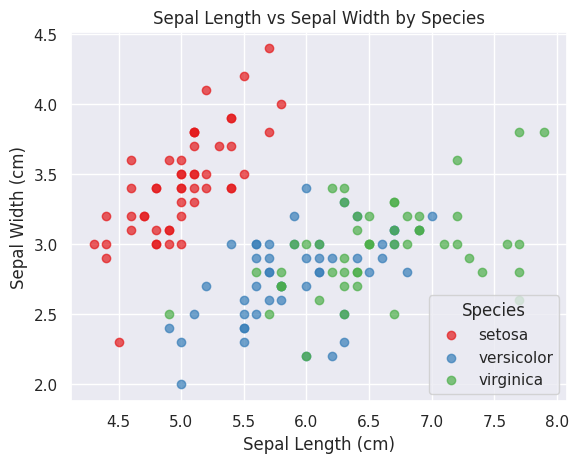

In [5]:
# 相同的功能如果只用Matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# 取得不同物種的名稱
species = iris['species'].unique()

# 設定顏色對應物種
colors = sns.color_palette("Set1", len(species))

# 根據物種繪製不同顏色的點
for i, sp in enumerate(species):
    species_data = iris[iris['species'] == sp]
    plt.scatter(species_data['sepal_length'], species_data['sepal_width'], 
                label=sp, color=colors[i], alpha=0.7)

# 設置標題和軸標籤
plt.title('Sepal Length vs Sepal Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# 顯示圖例
plt.legend(title='Species')

# 顯示圖形
plt.show()


函數 relplot() 如此命名是因為它旨在視覺化許多不同的統計關係。雖然散佈圖通常很有效，但用一條線更好地表示一個變數代表時間測量的關係

In [6]:
dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


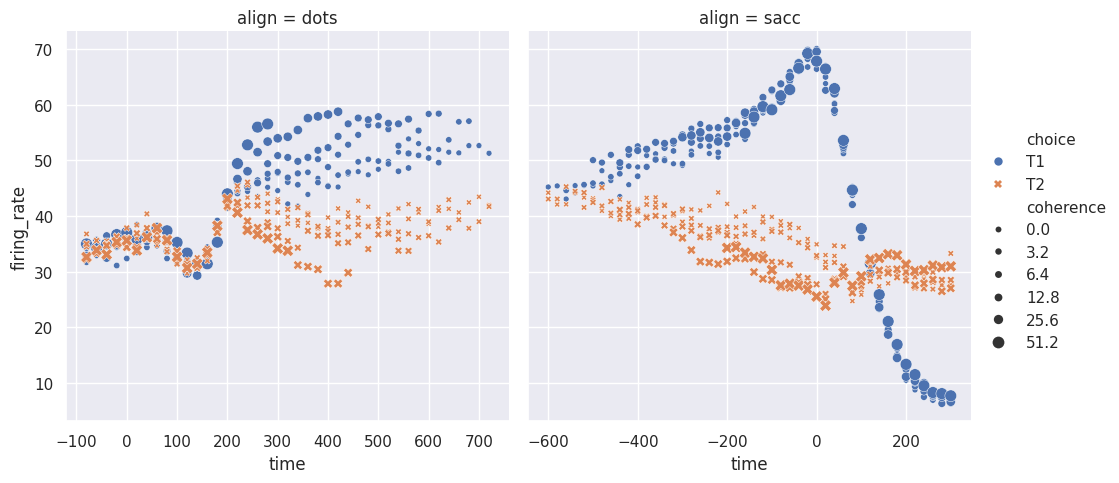

In [7]:
sns.relplot(
    data=dots,
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

↑ 這裡我們會發現用散佈圖其實不太適合
↓ 在下面的圖中，可以加入kind這個參數來改變繪圖方式

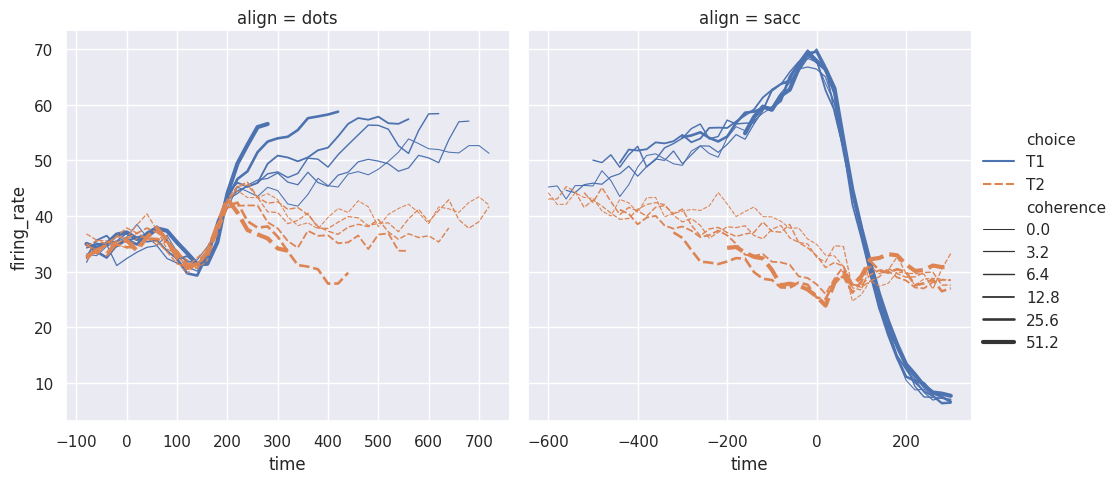

In [8]:
sns.relplot(
    data=dots, kind="line", #跟前面相比，這裡用了kind這個參數，可以指定使用線圖
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

In [9]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


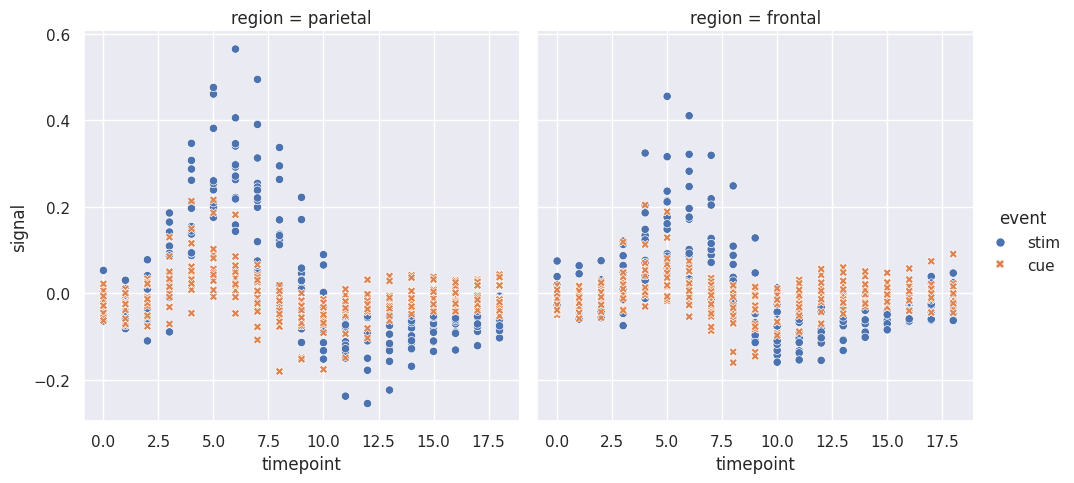

In [10]:
sns.relplot(
    data=fmri, 
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

↑ 同樣的我們會發現用點圖也不太適合

↓ 改成指定用線圖來製圖 通常，我們對一個變數作為其他變數的函數的平均值感興趣。許多seaborn函數將自動執行回答這些問題所需的統計估計：

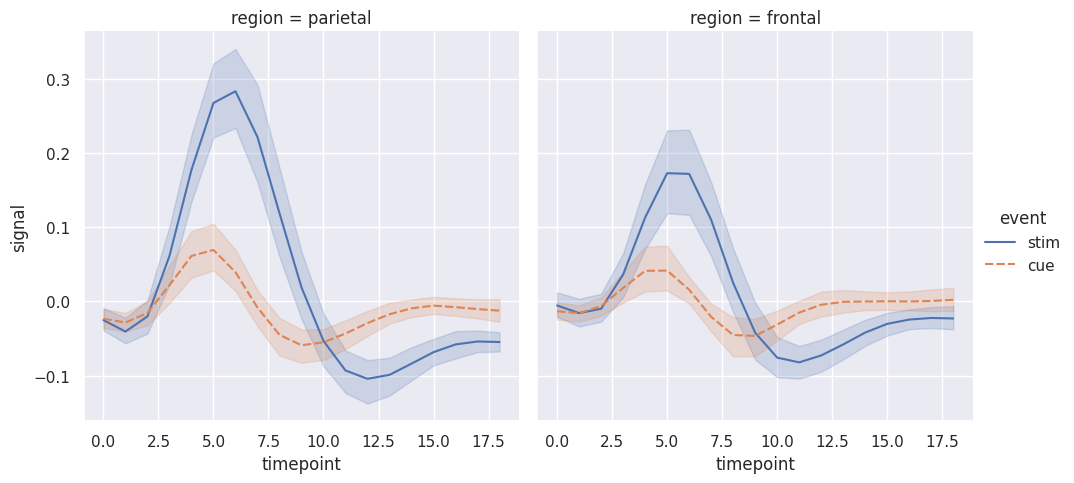

In [11]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

# Distributional representations

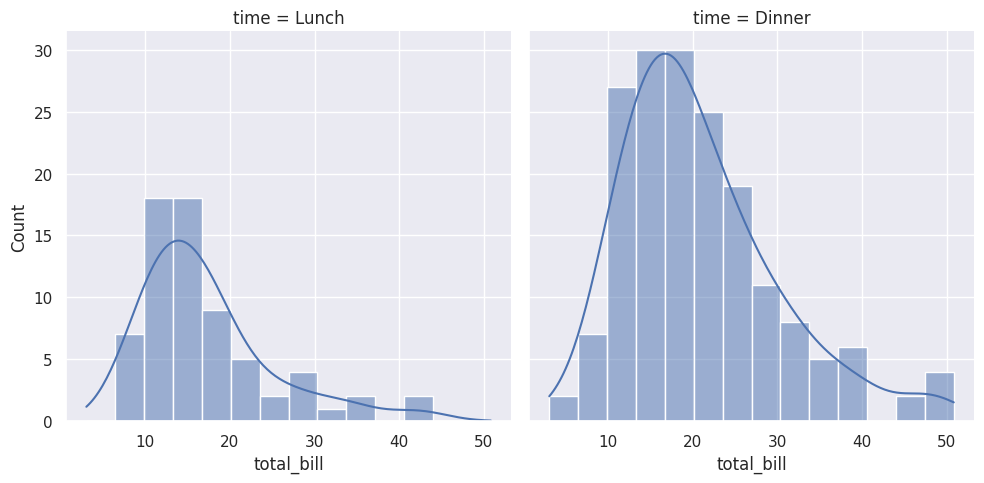

In [12]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

# Plots for categorical data
Seaborn 中的幾種專用繪圖類型是針對視覺化分類資料。可以透過 catplot() 存取它們。這些圖提供了不同程度的粒度。在最精細的層面上，您可能希望透過繪製「群」圖來查看每個觀察結果：一個散點圖，可調整點沿分類軸的位置，使它們不會重疊：

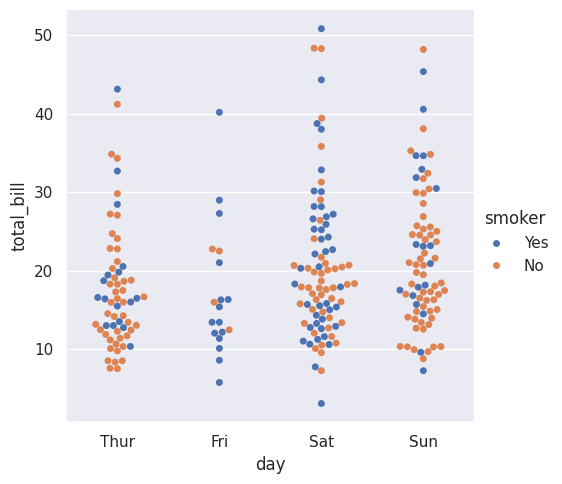

In [13]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

# Visualizing statistical relationships
https://seaborn.pydata.org/tutorial/relational.html
統計分析是了解資料集中的變數如何相互關聯以及這些關係如何依賴其他變數的過程。視覺化可以成為此過程的核心組成部分，因為當資料正確視覺化時，人類視覺系統可以看到表明關係的趨勢和模式。最常用的是 relplot()，用於使用兩種常見方法來視覺化統計關係：散點圖(scatter plots)和線圖(line plots)。

scatterplot() (with kind="scatter"; the default)
lineplot() (with kind="line")

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [15]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


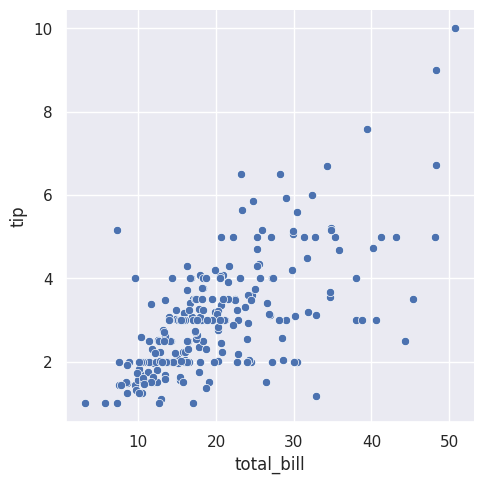

In [16]:
sns.relplot(data=tips, x="total_bill", y="tip")

In [17]:
np.corrcoef(tips['total_bill'], tips['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [18]:
#練習題
#繪出散佈圖 x為bill_length_mm, y為bill_depth_mm
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


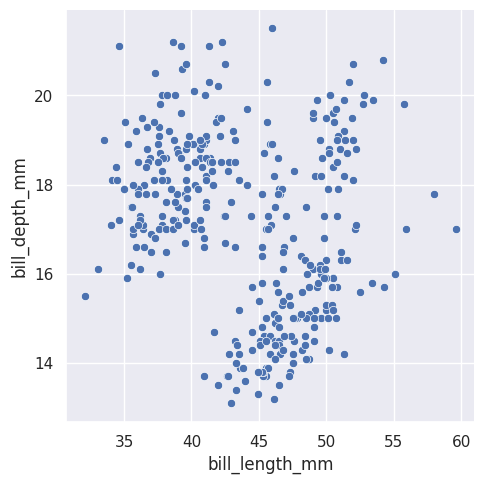

In [20]:
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

In [21]:
np.corrcoef(penguins['bill_length_mm'], penguins['bill_depth_mm'])

array([[nan, nan],
       [nan, nan]])

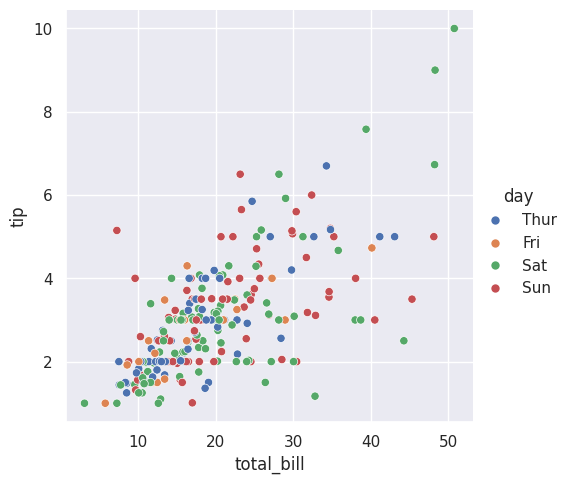

In [23]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day")

In [24]:
#練習題
#繪出散佈圖 x為bill_length_mm, y為bill_depth_mm, 分類為species
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


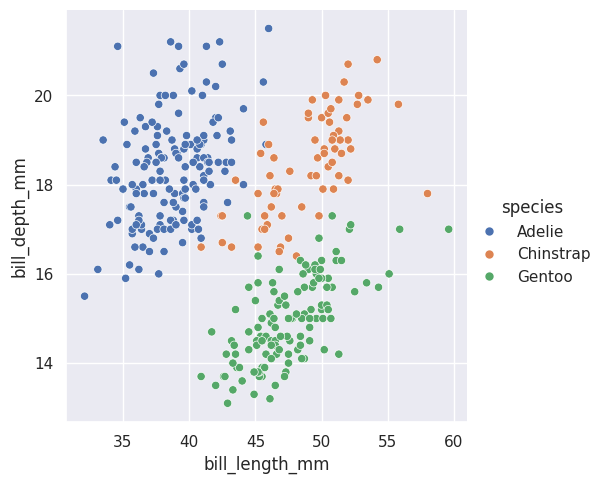

In [25]:
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")